In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage import label

import random

import pickle

from scipy.optimize import curve_fit

plt.style.use('seaborn-v0_8')

In [62]:
def lattice(n):
    lattice = np.zeros((n,n), dtype=int)
    return lattice

def vecinos(i,j, n, l):
    vecinos=[
        [(i-1)%n,j],
        [(i+1)%n,j],
        [i,(j-1)%n],
        [i,(j+1)%n]]
    return vecinos

In [63]:
def seed(n):
    l = lattice(n)
    for i in range(n):
        for j in range(n):
            l[i,j] = int(2*np.random.random())
    return l

In [64]:
def trees(l,p):
    n = len(l)
    for i in range(n):
        for j in range(n):
            e = np.random.random()
            if p >= e and l[i][j] == 0:
                l[i,j] = 1.0
    return l

In [65]:
cmap = mcolors.ListedColormap(['white', 'green', 'red'])
norm = mcolors.BoundaryNorm([0,1,2,3], cmap.N)

In [66]:
def fire(l,p):
    n = len(l)
    for i in range(n):
        for j in range(n):
            e = np.random.random()
            if p >= e and l[i,j] == 1:
                l[i,j] = 2.0
    return l

In [67]:
def wildfire(l):
    n = len(l)
    nl = l.copy()
    for i in range(n):
        for j in range(n):
            if l[i,j] == 2.0:
                for x,y in vecinos(i,j,n,l):
                    if l[x,y] == 1.0:
                        nl[x,y] = 2.0
    return nl

In [68]:
def transient(l):
    n = len(l)
    nl = l.copy()
    for i in range(n):
        for j in range(n):
            if not any(l[x,y] == 1.0 for x,y in vecinos(i,j,n,l)) and l[i,j] == 2.0:
                nl[i,j] = 0.0
    return nl

In [199]:
l = seed(100)

init_l = np.copy(l)


#ax1 = plt.gca();

#ax1.get_xaxis().set_visible(False)
#ax1.get_yaxis().set_visible(False)

#plt.imshow(l, cmap=cmap, norm=norm);
#plt.savefig('/home/gorilla/Documents/bU/Tópicos I/Implementación/img/0.jpg')


l = fire(l, 0.002)

#plt.imshow(l, cmap=cmap, norm=norm);
#plt.savefig('/home/gorilla/Documents/bU/Tópicos I/Implementación/img/1.jpg')

#c = 2

#center = (50,50)

min_d = 0

max_d = 50

rad = np.arange(min_d, max_d, 0.5)

#dist = np.sqrt((np.indices(l.shape)[0]-center[0])**2 + (np.indices(l.shape)[1] - center[1])**2)

F = []

for _ in range(25000):

    fcd = []

    fire_cells = [(x,y) for [x,y] in np.column_stack(np.where(l==2))]

    center = random.choice(fire_cells)

    dist = np.sqrt((np.indices(l.shape)[0]-center[0])**2 + (np.indices(l.shape)[1] - center[1])**2)

    
    for r in rad:

        m = (dist >= r) & (dist < r + 0.5)

        
        fc = np.sum((l[m]==2))

        
        fcd.append(fc)


    if l[center] == 2:

        F.append(fcd)

    l = wildfire(l)

    #plt.imshow(l, cmap=cmap, norm=norm);
    #plt.savefig(f'/home/gorilla/Documents/bU/Tópicos I/Implementación/img/{c}.jpg')

    l = transient(l)

    l = trees(l,0.015)

    #plt.imshow(l, cmap=cmap, norm=norm);
    #plt.savefig(f'/home/gorilla/Documents/bU/Tópicos I/Implementación/img/{c+1}.jpg')

    if [(x,y) for [x,y] in np.column_stack(np.where(l==2))] == []:

        l = fire(l, 0.001)


    #c += 2


In [200]:
#F contiene listas con la cuenta de los fuegos a distancia r del centro de la lattice.
#Para graficar D(r), consideramos el promedio para las últimas 20000 iteraciones

F = F[-20000:] 

F_a = np.array(F)

In [201]:
F_sum = np.sum(F_a, axis=0)

In [202]:
d = F_sum / len(F)

In [211]:
with open('D', 'wb') as file:
    pickle.dump(d, file)

In [186]:
with open('D', 'rb') as file: 
    D = pickle.load(file)

In [203]:
min_d = 0

max_d = 50

rad = np.arange(min_d, max_d, 0.5)

In [197]:
rad1 = np.arange(5, 50, 0.1)

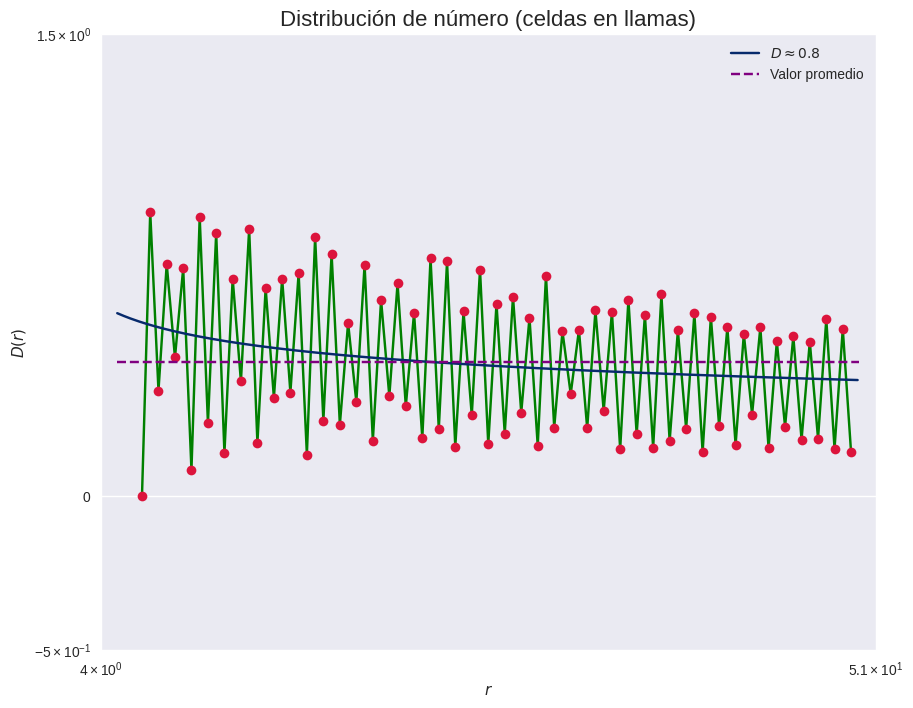

In [210]:
plt.figure(figsize=(10, 8))

plt.plot(n_rad, n_D, color="green")
plt.plot(n_rad, n_D,'o' ,color='crimson')
plt.plot(rad1, Dr(rad1, **p), color='#072A6C', label=r'$D \approx 0.8$')

plt.hlines(np.mean(n_D), xmin=5, xmax=50, colors='purple', linestyles='dashed', label='Valor promedio')

plt.xscale('symlog', linthresh=100)  
plt.yscale('symlog', linthresh=3)

plt.xlim(4, 51)
plt.ylim(-0.5, 1.5)

plt.xlabel(r'$r$')
plt.ylabel(r'$D(r)$')
plt.title('Distribución de número (celdas en llamas)', fontsize=16)

plt.legend()

plt.savefig('Dr.pdf')



In [204]:
def Dr(r, A, D, **kwargs):
    return A*r**(D-1)

In [205]:
d_r = dict(zip(d, rad))

In [206]:
filt_dr = {k: v for k, v in d_r.items() if v >6}

s_filt_dr = dict(sorted(filt_dr.items(), key=lambda item: item[1]))

In [207]:
n_D = list(s_filt_dr.keys())

n_rad = list(s_filt_dr.values())

In [208]:
params = curve_fit(Dr, n_rad, n_D)[0]

params_n = ['A', 'D']

p = dict(zip(params_n, params))

p

{'A': np.float64(0.816452355933535), 'D': np.float64(0.8022990896773472)}